# Exploratory Data Analysis - EPL

# Importing libiraries

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import itertools

%matplotlib inline

# Loading Datasets

In [125]:
location = "Datasets/Seasons Datasets/"

season_1 = pd.read_csv(location + '00-01.csv')
season_2 = pd.read_csv(location + '01-02.csv')
season_3 = pd.read_csv(location + '02-03.csv')
season_4 = pd.read_csv(location + '03-04.csv')
season_5 = pd.read_csv(location + '04-05.csv')
season_6 = pd.read_csv(location + '05-06.csv')
season_7 = pd.read_csv(location + '06-07.csv')
season_8 = pd.read_csv(location + '07-08.csv')
season_9 = pd.read_csv(location + '08-09.csv')
season_10 = pd.read_csv(location + '09-10.csv')
season_11 = pd.read_csv(location + '10-11.csv')
season_12 = pd.read_csv(location + '11-12.csv')
season_13 = pd.read_csv(location + '12-13.csv')
season_14 = pd.read_csv(location + '13-14.csv')
season_15 = pd.read_csv(location + '14-15.csv')
season_16 = pd.read_csv(location + '15-16.csv')
season_17 = pd.read_csv(location + '16-17.csv')
season_18 = pd.read_csv(location + '17-18.csv')
season_19 = pd.read_csv(location + '18-19.csv')
season_20 = pd.read_csv(location + '19-20.csv')
season_21 = pd.read_csv(location + '20-21.csv')

# Modify date

In [126]:
season_1['Date'] = pd.to_datetime(season_1['Date'])
season_2['Date'] = pd.to_datetime(season_2['Date'])
season_3['Date'] = pd.to_datetime(season_3['Date'])
season_4['Date'] = pd.to_datetime(season_4['Date'])
season_5['Date'] = pd.to_datetime(season_5['Date'])
season_6['Date'] = pd.to_datetime(season_6['Date'])
season_7['Date'] = pd.to_datetime(season_7['Date'])
season_8['Date'] = pd.to_datetime(season_8['Date'])
season_9['Date'] = pd.to_datetime(season_9['Date'])
season_10['Date'] = pd.to_datetime(season_10['Date'])
season_11['Date'] = pd.to_datetime(season_11['Date'])
season_12['Date'] = pd.to_datetime(season_12['Date'])
season_13['Date'] = pd.to_datetime(season_13['Date'])
season_14['Date'] = pd.to_datetime(season_14['Date'])
season_15['Date'] = pd.to_datetime(season_15['Date'])
season_16['Date'] = pd.to_datetime(season_16['Date'])
season_17['Date'] = pd.to_datetime(season_17['Date'])
season_18['Date'] = pd.to_datetime(season_18['Date'])
season_19['Date'] = pd.to_datetime(season_19['Date'])
season_20['Date'] = pd.to_datetime(season_20['Date'])
season_21['Date'] = pd.to_datetime(season_21['Date'])

# Get the statistical data

In [127]:
columns = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HS','AS',
               'HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']

df_1 = season_1[columns]                      
df_2 = season_2[columns]
df_3 = season_3[columns]
df_4 = season_4[columns]
df_5 = season_5[columns]
df_6 = season_6[columns]
df_7 = season_7[columns]
df_8 = season_8[columns]
df_9 = season_9[columns]
df_10 = season_10[columns]
df_11 = season_11[columns]   
df_12 = season_12[columns]
df_13 = season_13[columns]
df_14 = season_14[columns]
df_15 = season_15[columns]
df_16 = season_16[columns]
df_17 = season_17[columns]
df_18 = season_18[columns]
df_19 = season_19[columns]
df_20 = season_20[columns]
df_21 = season_21[columns]

df_21.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,2020-12-09,Fulham,Arsenal,0,3,A,5,13,2,6,12,12,2,3,2,2,0,0
1,2020-12-09,Crystal Palace,Southampton,1,0,H,5,9,3,5,14,11,7,3,2,1,0,0
2,2020-12-09,Liverpool,Leeds,4,3,H,22,6,6,3,9,6,9,0,1,0,0,0
3,2020-12-09,West Ham,Newcastle,0,2,A,15,15,3,2,13,7,8,7,2,2,0,0
4,2020-09-13,West Brom,Leicester,0,3,A,7,13,1,7,12,9,2,5,1,1,0,0


# Merge all data together

In [128]:
all_stat = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12,df_13,df_14,df_15,
                     df_16,df_17,df_18,df_19,df_20, df_21])

In [129]:
matches = all_stat.shape[0]
feats = all_stat.shape[1]

hWins = len(all_stat[all_stat.FTR == 'H'])

win_rate = (float(hWins) / (matches)) * 100

# Print the results
print ("Total number of matches: {}".format(matches))
print ("Number of features: {}".format(feats))
print ("Number of matches won by home team: {}".format(hWins))
print ("Win rate of home team: {:.2f}%".format(win_rate))

Total number of matches: 7980
Number of features: 18
Number of matches won by home team: 3659
Win rate of home team: 45.85%


# Explore the Data

In [130]:
def get_result_statistics(df, year):
    return pd.DataFrame(data = [ df[df.FTR == 'H'].value_counts().sum(),
                                 df[df.FTR == 'A'].value_counts().sum(),
                                 df[df.FTR == 'D'].value_counts().sum()],
                        index = ['Home Wins', 'Away Wins', 'Draws'],
                        columns =[year]
                       ).T

In [131]:
tot_res = get_result_statistics(all_stat, "Overall results.")

season_1_results = get_result_statistics(df_1, "00-01") 
season_2_results = get_result_statistics(df_2, "01-02") 
season_3_results = get_result_statistics(df_3, "02-03") 
season_4_results = get_result_statistics(df_4, "03-04") 
season_5_results = get_result_statistics(df_5, "04-05") 
season_6_results = get_result_statistics(df_6, "05-06") 
season_7_results = get_result_statistics(df_7, "06-07") 
season_8_results = get_result_statistics(df_8, "07-08") 
season_9_results = get_result_statistics(df_9, "08-09") 
season_10_results = get_result_statistics(df_10, "09-10") 
season_11_results = get_result_statistics(df_11, "10-11") 
season_12_results = get_result_statistics(df_12, "11-12") 
season_13_results = get_result_statistics(df_13, "12-13") 
season_14_results = get_result_statistics(df_14, "13-14") 
season_15_results = get_result_statistics(df_15, "14-15") 
season_16_results = get_result_statistics(df_16, "15-16") 
season_17_results = get_result_statistics(df_17, "16-17") 
season_18_results = get_result_statistics(df_18, "17-18") 
season_19_results = get_result_statistics(df_19, "18-19") 
season_20_results = get_result_statistics(df_20, "19-20") 
season_21_results = get_result_statistics(df_21, "20-21") 

In [132]:
result_statistics = pd.concat([season_1_results,season_2_results,season_3_results,season_4_results,
                         season_4_results,season_5_results,season_6_results,season_7_results,season_8_results,season_9_results,
                         season_10_results,season_11_results,season_12_results,season_13_results,season_14_results
                         ,season_15_results,season_16_results,season_17_results,season_18_results,season_19_results,
                         season_20_results, season_21_results])

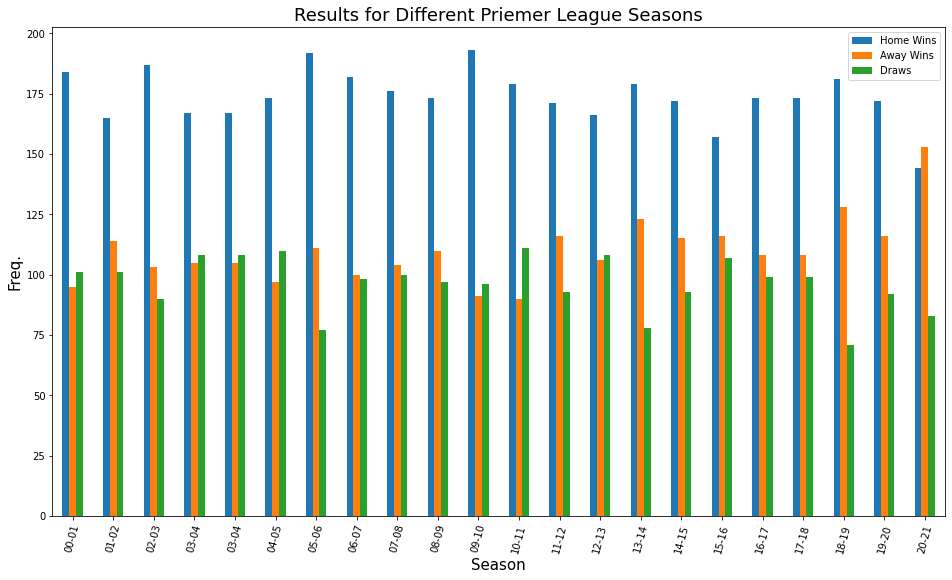

In [142]:
result_statistics.plot(kind = 'bar', figsize=(16,9));
plt.title("Results for Different Priemer League Seasons", size = 18);
plt.xlabel('Season', size = 15);
plt.ylabel('Freq.', size = 15);
plt.xticks(rotation=75);
plt.show();

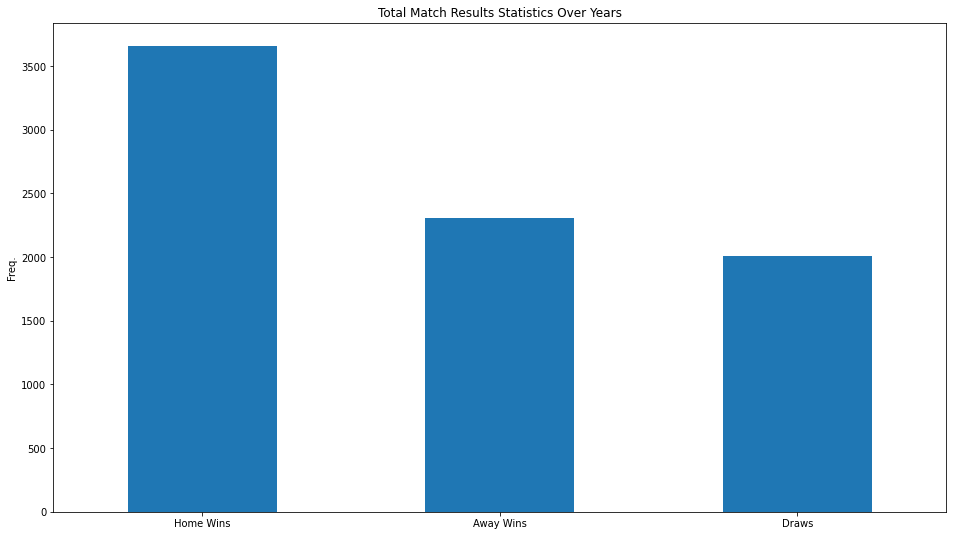

In [134]:
tot_res.T.plot(kind = 'bar', title = "Total Match Results Statistics Over Years", figsize=(16,9), legend = False);
plt.ylabel('Freq.');
plt.xticks(rotation=0);
plt.show();

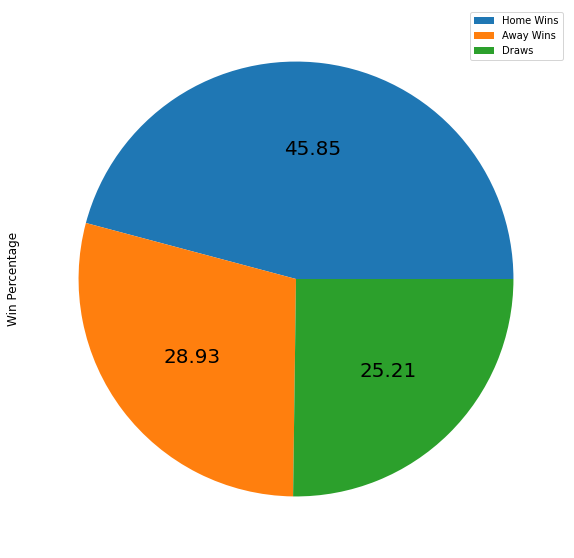

In [135]:
# Plots average win percentage as a pie chart.
tot_res.sum().plot(kind='pie', figsize =[10,10],autopct='%.2f', y='Win Percentage', fontsize =20, labels = None,
                          legend = True)
plt.ylabel("Win Percentage", size = 12)

plt.show()


# Season result statistics

In [136]:
total = result_statistics.sum().sum()
draw = result_statistics['Draws'].sum()
draw_percentage = (draw/total) * 100
print ("No. of matches that ended with draw over the entire dataset: {}".format(draw_percentage.round(3)))

No. of matches that ended with draw over the entire dataset: 25.359


## Each season wins statistics

In [137]:
result_perc = result_statistics.T

for column in result_perc.columns:
    result_perc[column] = (result_perc[column] * 100) / 380  #No. of total matches in a year

# Print df
result_perc.T

,Home Wins,Away Wins,Draws
00-01,48.421053,25.000000,26.578947
01-02,43.421053,30.000000,26.578947
02-03,49.210526,27.105263,23.684211
03-04,11.565097,7.271468,7.479224
03-04,11.565097,7.271468,7.479224
04-05,45.526316,25.526316,28.947368
05-06,50.526316,29.210526,20.263158
06-07,47.894737,26.315789,25.789474
07-08,46.315789,27.368421,26.315789
08-09,45.526316,28.947368,25.526316


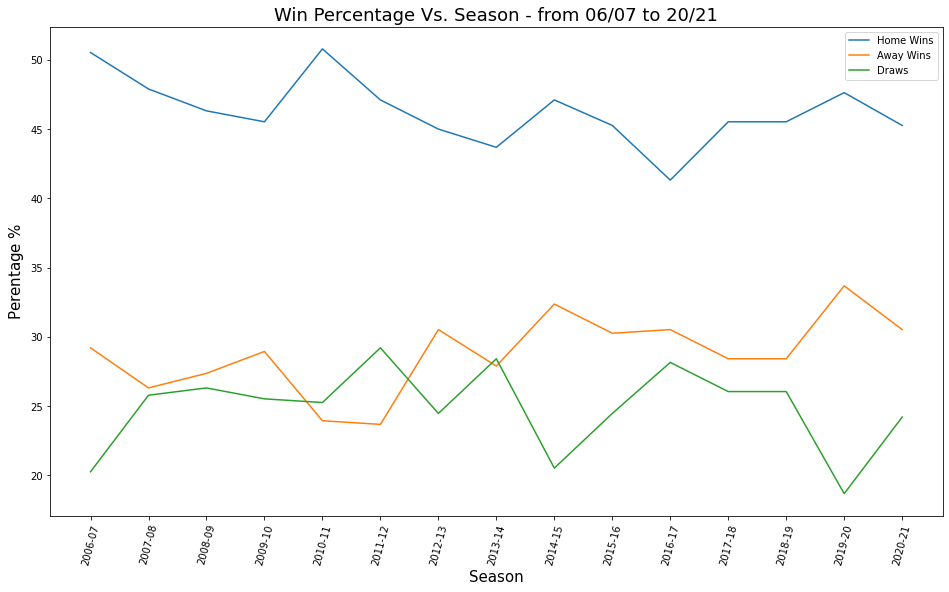

In [139]:
result_perc.T.iloc[6:21].plot(figsize = [16,9]);
plt.xlabel('Season', size = 15);
plt.title('Win Percentage Vs. Season - from 06/07 to 20/21', size = 18)
plt.ylabel(r'Perentage $\%$', size = 15);
plt.xticks(np.arange(15), ( '2006-07', '2007-08',
                            '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15','2015-16',
                            '2016-17','2017-18','2018-19','2019-20','2020-21'), rotation = 75);
plt.show()